# Analysis of Top Women Chess Players

### Content
+ Introduction: Top Women Chess Players
+ Data description and objectives
+ Research question
+ Data manipulation and validation
+ Data analysis and visualization 
+ Conclusion

## Part 1-Introduction
Chess, without a doubt, helps people develop their character, mental abilities, logical thinking, spiritual development, perseverance in understanding the goal set for themselves, has an aesthetic effect - all this strengthens moral strength and contributes to the formation of a person's personality.Compared to men, women have taken up chess seriously relatively recently. While the professional level of women is objectively lower, but they are much less than men.Women's chess is gaining popularity, and who knows, maybe we will see a female world champion again?The international chess Federation (FIDE) manages international chess competitions. The Elo FIDE rating is used to calculate the relative skill levels of players.The dataset contains detailed information about the best female chess players in the world, sorted by their standard FIDE rating (from highest to lowest above 1800 Elo), updated in August 2020. The data includes all active and inactive players that can be identified by the Inactive_flag column. So, the main goal of the project is to explore and see the power women chess.

### Part 2-Data description
The popularity factor is Central to this study. The analysis is based on a ready-made data set taken from the site kaggle.com : (https://www.kaggle.com/vikasojha98/top-women-chess-players). This data set contains detailed information about the world's best chess players, sorted by their standard FIDE rating (from highest to lowest above 1800 Elo), updated in August 2020.The data contains 10 columns, each of which contains information about the subscription. Each function is described in detail below.
1.   ID
2.   Name - the name of the chess player.
3. Federation-Federation of player (Country).
4.  Gender-the gender of the player.
5.  Year_of_birthday-date of birth of the player.
6.  Title -Chess Title.
7.  Standard_Rating-Classical game Rating.
8.  Rapid_rating-Rapid game Rating.
9.  Blitz_rating-Blitz game Rating.
10.  Inactive_flag-Flag of inactivity (wi - woman inactive)

### Part 3-RESEARCH QUESTION
For detailed and deep analysis, we need to answer to the following questions:
1. Analysis of top 10 women in chess
2. Analysis of top 10 dominant countries
3. Age analysis of women                                                                                                
4. Title analysis 
5. Analysis of the impact of rating on winnings

## Part 4. Data manipulation and validation
Below we are going to delete data that we don't need. In order to discard data for our analysis, we need to take a good look at our data.We need to perform some data validation to make sure that the data set is complete and we can start our analysis.

In [1]:
# importing useful packages
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import random

In [2]:
# making data frame from csv file  
top = pd.read_csv(r"C:\Users\admin\project\top_women_chess_players_aug_2020.csv",delimiter = ",",
            encoding = "UTF-8", doublequote=True, engine="python", quotechar='"', quoting=csv.QUOTE_ALL)
top.head(10)

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,F,1976.0,GM,2675,2646.0,2736.0,wi
1,8602980,"Hou, Yifan",CHN,F,1994.0,GM,2658,2621.0,2601.0,NaN
2,5008123,"Koneru, Humpy",IND,F,1987.0,GM,2586,2483.0,2483.0,NaN
3,4147103,"Goryachkina, Aleksandra",RUS,F,1998.0,GM,2582,2502.0,2441.0,NaN
4,700088,"Polgar, Susan",HUN,F,1969.0,GM,2577,NaN,NaN,wi
5,8600147,"Xie, Jun",CHN,F,1970.0,GM,2574,NaN,NaN,wi
6,8603006,"Ju, Wenjun",CHN,F,1991.0,GM,2560,2610.0,2536.0,NaN
7,14109336,"Lagno, Kateryna",RUS,F,1989.0,GM,2546,2521.0,2608.0,NaN
8,14114550,"Muzychuk, Mariya",UKR,F,1992.0,GM,2544,2506.0,2326.0,NaN
9,12801259,"Cmilyte, Viktorija",LTU,F,1983.0,GM,2538,2394.0,2435.0,wi


First of all we will remove the zero values that will not give us anything

In [3]:
#Finding zero values
top.isnull().sum()

Fide id               0
Name                  0
Federation            0
Gender                0
Year_of_birth       292
Title              5435
Standard_Rating       0
Rapid_rating       4945
Blitz_rating       5081
Inactive_flag      2701
dtype: int64

In [4]:
# missed values are given by "-", which needs to be replaced by nan
top['Blitz_rating'].replace('', np.nan, inplace=True)
#delete
top.dropna(subset=['Blitz_rating'], inplace=True)
top['Title'].replace('', np.nan, inplace=True)
top.dropna(subset=['Title'], inplace=True)
top['Rapid_rating'].replace('', np.nan, inplace=True)
top.dropna(subset=['Rapid_rating'], inplace=True)
top['Inactive_flag'].replace('', np.nan, inplace=True)
top.dropna(subset=['Inactive_flag'], inplace=True)
top['Year_of_birth'].replace('', np.nan, inplace=True)
top.dropna(subset=['Year_of_birth'], inplace=True)

In [5]:
#check whether we got rid of the zero
top.isnull().sum()

Fide id            0
Name               0
Federation         0
Gender             0
Year_of_birth      0
Title              0
Standard_Rating    0
Rapid_rating       0
Blitz_rating       0
Inactive_flag      0
dtype: int64

In [6]:
# some columns with numeric values should be converted to int type
top = top.astype({"Standard_Rating": "int","Rapid_rating": "int","Blitz_rating": "int","Year_of_birth": "int"})

top.head(4)

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,F,1976,GM,2675,2646,2736,wi
9,12801259,"Cmilyte, Viktorija",LTU,F,1983,GM,2538,2394,2435,wi
15,13600036,"Chiburdanidze, Maia",GEO,F,1961,GM,2500,2432,2437,wi
22,4134974,"Kosintseva, Nadezhda",RUS,F,1985,GM,2483,2516,2519,wi


# 4.1 Data validation: identify columns with missed values

In [7]:
# create dataframe with column names and number of values in each column 
df_validation = pd.DataFrame()
df_validation["Columns"] = list(top.columns)
df_validation["Count"] = list(top.count())

df_validation.head(5)

,Columns,Count
0,Fide id,465
1,Name,465
2,Federation,465
3,Gender,465
4,Year_of_birth,465


In [8]:
color_validation = ["royalblue"] * len(df_validation["Columns"])

# color is changed: if there is at least 1 missed values and if more than 10 missed values
for i, val in enumerate(df_validation["Count"]):
    if val < 465:
        color_validation[i] = "seagreen"
    if val < 460:
        color_validation[i] = "indianred"

Text(0.5, 1.0, 'Figure 4.1  Columns table')

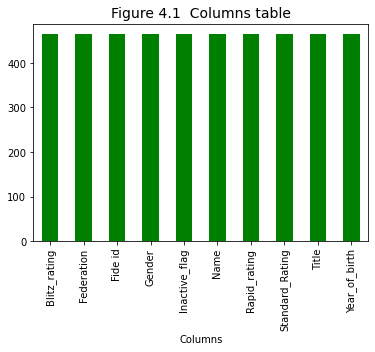

In [9]:
df_validation.groupby('Columns').Count.sum().plot(kind='bar',color=['green'])
plt.title('Figure 4.1  Columns table' , fontsize = 14)

So we don't have any missing values.

# Part-5. Data analysis and visualization 
In this section, we are going to answer the project's challenges by applying some data analysis and visualization techniques.

## Part-5.1 Age analysis of women

Text(0.5, 1.0, 'Figure 5.1 diagram of Year_of_birth')

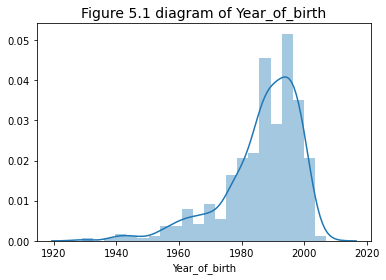

In [10]:
#You should find out which age prevails the most using a displot
sns.distplot(top.Year_of_birth)
plt.title('Figure 5.1 diagram of Year_of_birth' , fontsize = 14)

In this graph, we can see that women born in 1990-2000 predominate . This means at the age of 20-30 years. Because at this age, many people are already graduating from schools and universities and they have a lot of time to give in to their hobby.

In [11]:
#High, Low 
top.groupby('Year_of_birth').agg(['min','max']).transpose()

Year_of_birth                      1929            1939                  1940  \
Fide id         min             4149289         4149270               4109112   
                max             4149289         4149270               4109112   
Name            min  Trotsenko, Evgenia  Lunkina, Yulia  Belavenets, Liudmila   
                max  Trotsenko, Evgenia  Lunkina, Yulia  Belavenets, Liudmila   
Federation      min                 RUS             RUS                   RUS   
                max                 RUS             RUS                   RUS   
Gender          min                   F               F                     F   
                max                   F               F                     F   
Title           min                 WFM             WFM                   WIM   
                max                 WFM             WFM                   WIM   
Standard_Rating min                1937            1849                  2190   
                max                1937            1849                  2190   
Rapid_rating    min                1909            1727                  2095   
                max                1909            1727                  2095   
Blitz_rating    min                1840            1707                  2052   
                max                1840            1707                  2052   
Inactive_flag   min                  wi              wi                    wi   
                max                  wi              wi                    wi   

Year_of_birth                        1941                    1943  \
Fide id         min               4110986                 4137442   
                max               4110986                 4137442   
Name            min  Kalashnikova, Larisa  Kalashnikova, Nadezhda   
                max  Kalashnikova, Larisa  Kalashnikova, Nadezhda   
Federation      min                   RUS                     RUS   
                max                   RUS                     RUS   
Gender          min                     F                       F   
                max                     F                       F   
Title           min                   WFM                     WFM   
                max                   WFM                     WFM   
Standard_Rating min                  1884                    2129   
                max                  1884                    2129   
Rapid_rating    min                  1808                    1859   
                max                  1808                    1859   
Blitz_rating    min                  1816                    1969   
                max                  1816                    1969   
Inactive_flag   min                    wi                      wi   
                max                    wi                      wi   

Year_of_birth                    1945               1948              1951  \
Fide id         min            602647            4119304          13900129   
                max           4137256            4119304          13900129   
Name            min  Kuznetsova, Luba  Shushpanova, Nina  Agababean, Naira   
                max     Pytel, Bozena  Shushpanova, Nina  Agababean, Naira   
Federation      min               FRA                RUS               MDA   
                max               RUS                RUS               MDA   
Gender          min                 F                  F                 F   
                max                 F                  F                 F   
Title           min               WFM                WFM               WGM   
                max               WIM                WFM               WGM   
Standard_Rating min              1854               1918              2161   
                max              1945               1918              2161   
Rapid_rating    min              1877               1905              2121   
                max              1916               1905

In [12]:
name_federation = pd.DataFrame() #separate dataframe 
name_federation['Name'] = top['Name'] 
name_federation['Federation'] = top['Federation']
name_federation['Year'] = top['Year_of_birth']
name_federation['Rapid_rating'] = top['Rapid_rating']
name_federation.head(8)

,Name,Federation,Year,Rapid_rating
0,"Polgar, Judit",HUN,1976,2646
9,"Cmilyte, Viktorija",LTU,1983,2394
15,"Chiburdanidze, Maia",GEO,1961,2432
22,"Kosintseva, Nadezhda",RUS,1985,2516
26,"Kosintseva, Tatiana",RUS,1986,2496
44,"Galliamova, Alisa",RUS,1972,2356
56,"Zhu, Chen",QAT,1976,2404
109,"Paikidze, Nazi",USA,1993,2402


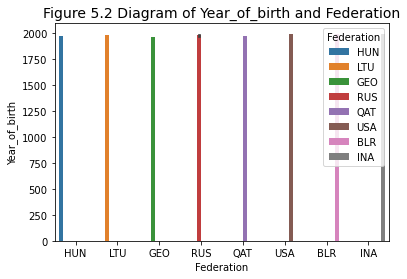

In [13]:
#show from which countries the age category prevails
, ax = plt.plots(figsize=(100, 30))
ax = sns.barplot(data=top.head(10), x='Federation', y='Year_of_birth', hue="Federation")
ax.set(xlabel='Federation', ylabel='Year_of_birth')
plt.title('Figure 5.2 Diagram of Year_of_birth and Federation' , fontsize = 14)
plt.show()

## Part-5.2 Title analysis



In [14]:
name_federation = pd.DataFrame() #separate dataframe 
name_federation['Name'] = top['Name'] 
name_federation['Title'] = top['Title']
name_federation.head(10)

,Name,Title
0,"Polgar, Judit",GM
9,"Cmilyte, Viktorija",GM
15,"Chiburdanidze, Maia",GM
22,"Kosintseva, Nadezhda",GM
26,"Kosintseva, Tatiana",GM
44,"Galliamova, Alisa",IM
56,"Zhu, Chen",GM
109,"Paikidze, Nazi",IM
111,"Ziaziulkina, Nastassia",IM
126,"Aulia, Medina Warda",IM


Our title includes GM, WGM, IM, FM, WH, CM, WCM 

Text(0.5, 1.0, 'Figure 5.3 Diagram of Title')

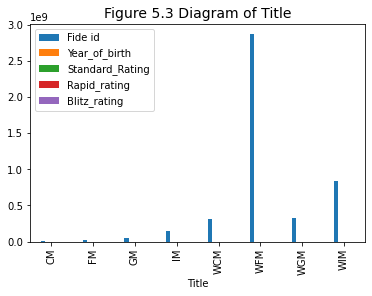

In [15]:
top.groupby('Title').sum().plot(kind='bar')#group title
plt.title('Figure 5.3 Diagram of Title' , fontsize = 14)

Title 
+ WCM-woman candidate master
+ CM-Candidate Master
+ FM-FIDE Master
+ WFM-The woman FIDE master
+ GM-Grandmaster
+ IM-International Master
+ WGM-Woman Grandmaster
+ WIM-Woman International Master

On this chart:
you can see that WCM is most prevalent. International women's master candidates - the lowest rank awarded by FIDE. This title can be obtained by gaining a FIDE rating of 2000 or higher.


In [16]:
#show the number of players for each title
top_title = top.Title.value_counts().reset_index().rename(columns={'index':'Title', 'Title':'Count players'})[0:8]
top_title.index += 1
print(top_title)

  Title  Count players
1   WFM            251
2   WIM            113
3   WGM             37
4   WCM             36
5    IM             18
6    GM              6
7    FM              3
8    CM              1


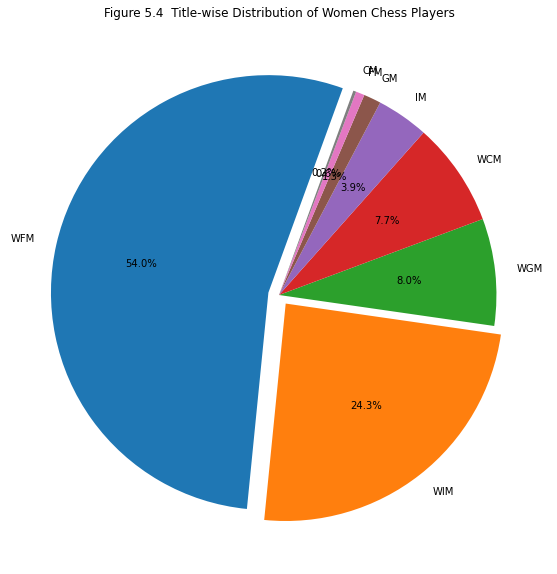

In [17]:
# Pie chart of Title-wise distribution of Chess Players 
labels = top_title['Title']
sizes = top_title['Count players']
fig1, ax1 = plt.subplots(figsize=(10,10))
explode = (0.05,0.05,0,0,0,0,0,0) 
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', startangle=70)
plt.title("Figure 5.4  Title-wise Distribution of Women Chess Players")
plt.show()

In this pie chart, we can see the ratio of the title in percentages. And here we can already say for sure that 54.0% is a woman candidate master.

## Part-5.3 Analysis of top 10 dominant countries

In [18]:
name_federation = pd.DataFrame() #separate dataframe 
name_federation['Name'] = top['Name'] 
name_federation['Federation'] = top['Federation']
name_federation.head(10)

,Name,Federation
0,"Polgar, Judit",HUN
9,"Cmilyte, Viktorija",LTU
15,"Chiburdanidze, Maia",GEO
22,"Kosintseva, Nadezhda",RUS
26,"Kosintseva, Tatiana",RUS
44,"Galliamova, Alisa",RUS
56,"Zhu, Chen",QAT
109,"Paikidze, Nazi",USA
111,"Ziaziulkina, Nastassia",BLR
126,"Aulia, Medina Warda",INA


We need to know the exact number of players in each country to find out the top 10 dominant countries in chess.

In [19]:
#show the country with the number of players
country_data=top.groupby('Federation', as_index=False)['Name'].count().sort_values('Name',ascending=False)
country_data.reset_index(drop=True,inplace=True)
country_data.columns=['Federation','Number_of_players']
country_data.head(10)

,Federation,Number_of_players
0,RUS,170
1,UKR,23
2,GEO,14
3,VIE,13
4,VEN,13
5,KAZ,12
6,MGL,11
7,BLR,10
8,COL,9
9,INA,8


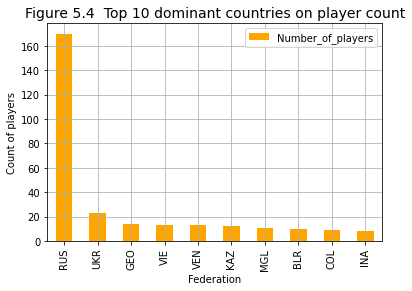

In [20]:
#show Top 10 countries based on player count
country_data[0:10].plot(kind='bar',x='Federation',y='Number_of_players', grid=True,color='orange')
plt.xlabel('Federation')
plt.ylabel('Count of players')
plt.title('Figure 5.4  Top 10 dominant countries on player count' , fontsize = 14)
plt.show()

The following conclusions can be drawn from this schedule. That the majority of players are from Russia is 170 women.This shows that the country is well prepared and serious about chess

  Country  Total WGMs
0     RUS          15
1     UKR           4
2     EGY           2
3     USA           2
4     GEO           2
5     AZE           2
6     MDA           1
7     TKM           1
8     MGL           1
9     SUI           1


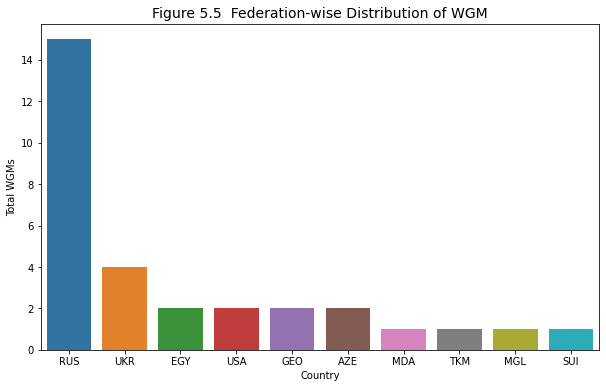

In [21]:
#show countries that have a WGM players
country_wgm = top[top.Title=='WGM'].Federation.value_counts().reset_index().rename(columns={'index':'Country', 'Federation':'Total WGMs'})[:10]
print(country_wgm)

plt.figure(figsize=(10,6))
plt.title("Figure 5.5  Federation-wise Distribution of WGM", fontsize = 14)
sns.barplot(x = "Country", y="Total WGMs", data=country_wgm)
plt.show()

Russia leads with most number of women chess players with more than 54% of total women chess players.


## Part-5.4 Analysis of top 10 women in chess


In [22]:
#show best 10 women in chess 
standard_ratings = top.sort_values(by = 'Standard_Rating' , ascending = False)
standard_ratings.head(10)

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,F,1976,GM,2675,2646,2736,wi
9,12801259,"Cmilyte, Viktorija",LTU,F,1983,GM,2538,2394,2435,wi
15,13600036,"Chiburdanidze, Maia",GEO,F,1961,GM,2500,2432,2437,wi
22,4134974,"Kosintseva, Nadezhda",RUS,F,1985,GM,2483,2516,2519,wi
26,4133471,"Kosintseva, Tatiana",RUS,F,1986,GM,2475,2496,2506,wi
44,4129725,"Galliamova, Alisa",RUS,F,1972,IM,2438,2356,2412,wi
56,8600546,"Zhu, Chen",QAT,F,1976,GM,2423,2404,2378,wi
109,13603620,"Paikidze, Nazi",USA,F,1993,IM,2374,2402,2314,wi
111,13505211,"Ziaziulkina, Nastassia",BLR,F,1995,IM,2373,2299,2271,wi
126,7101570,"Aulia, Medina Warda",INA,F,1997,IM,2360,2344,2199,wi


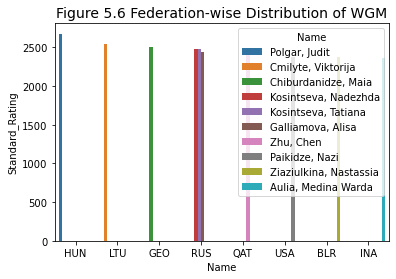

In [23]:
#show Federation-wise Distribution of WGM
, ax = plt.plots(figsize=(200, 100))
ax = sns.barplot(data=standard_ratings.head(10), x='Federation', y='Standard_Rating',hue='Name')
ax.set(xlabel='Name', ylabel='Standard_Rating')
plt.title("Figure 5.6 Federation-wise Distribution of WGM", fontsize = 14)
plt.show()

On this chart, you can see the top 10 female chess players. Where three of them are from Russia.

## Part-5.5  Analysis of the impact of rating on winnings

In [24]:
#show best 10 women in chess 
rapid_ratings = top.sort_values(by = 'Rapid_rating' , ascending = False)
rapid_ratings.head(10)

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,F,1976,GM,2675,2646,2736,wi
22,4134974,"Kosintseva, Nadezhda",RUS,F,1985,GM,2483,2516,2519,wi
26,4133471,"Kosintseva, Tatiana",RUS,F,1986,GM,2475,2496,2506,wi
15,13600036,"Chiburdanidze, Maia",GEO,F,1961,GM,2500,2432,2437,wi
56,8600546,"Zhu, Chen",QAT,F,1976,GM,2423,2404,2378,wi
109,13603620,"Paikidze, Nazi",USA,F,1993,IM,2374,2402,2314,wi
9,12801259,"Cmilyte, Viktorija",LTU,F,1983,GM,2538,2394,2435,wi
412,1019481,"Schut, Lisa",NED,F,1994,WIM,2259,2383,2234,wi
44,4129725,"Galliamova, Alisa",RUS,F,1972,IM,2438,2356,2412,wi
319,4185641,"Ivakhinova, Inna",RUS,F,1989,WGM,2278,2349,2307,wi


In [25]:
#show best 10 women in chess 
blitz_ratings = top.sort_values(by = 'Blitz_rating' , ascending = False)
blitz_ratings.head(10)

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,F,1976,GM,2675,2646,2736,wi
22,4134974,"Kosintseva, Nadezhda",RUS,F,1985,GM,2483,2516,2519,wi
26,4133471,"Kosintseva, Tatiana",RUS,F,1986,GM,2475,2496,2506,wi
15,13600036,"Chiburdanidze, Maia",GEO,F,1961,GM,2500,2432,2437,wi
9,12801259,"Cmilyte, Viktorija",LTU,F,1983,GM,2538,2394,2435,wi
44,4129725,"Galliamova, Alisa",RUS,F,1972,IM,2438,2356,2412,wi
56,8600546,"Zhu, Chen",QAT,F,1976,GM,2423,2404,2378,wi
173,322750,"Nemcova, Katerina",USA,F,1990,WGM,2331,2276,2361,wi
156,13600656,"Lomineishvili, Maia",GEO,F,1977,IM,2342,2347,2348,wi
166,4139518,"Zaiatz, Elena",RUS,F,1969,IM,2336,2258,2342,wi


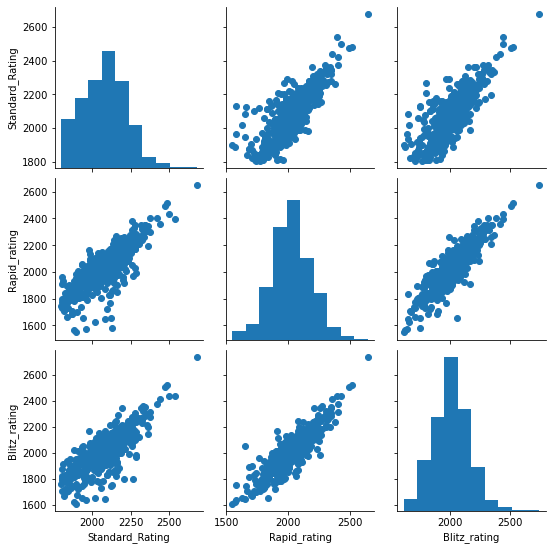

In [26]:
#show all ratings
rating= sns.PairGrid(top[['Standard_Rating' , 'Rapid_rating' , 'Blitz_rating']])
rating.map_upper(plt.scatter)
rating.map_diag(plt.hist)
rating.map_lower(plt.scatter)
plt.show()

Look at the charts of rapid and blitz rating histograms and you can see that most of the players scored about 2000 points.

## Part-6 Conclusion
Based on the analysis given above we could conclude several things about  of Top Women Chess Players

+ Players with Grand Master trophy have the highest Rapid and Standard scores among players.Those who had higher rapid rating, had also higher blitz rating
* Russia has the most number of players  is 170 women
+ Players with ages between 20-35 have the most popularity.
* In the standard ranking, more than 2,600 players scored less than 2,000 points, which is below average, and fewer than 1,800 players scored more than 2,500 points. The standard rating affects the player's win and place.
+ Polgar Judiry has been in the top-1 rating for standard, rapid and blitz chess plays
 
